#### Coding the program to find is there a significant difference btw all the membership status and there spending 

In [ ]:
# Import the file csv to get the columns Data and the pandas lib.
import pandas as pd

df=pd.read_csv('C:/Users/5530/OneDrive/Desktop/Mall_Customer_Segmentation/Data_files/customer_arrivals_removed_outliers_.csv')

In [13]:
# import the function form the file 

import sys 
sys.path.append("..")

from Assumption_check import check_equal_variance,check_Normality

In [14]:
#Forming array for the varaious status
grouped_spending =[

    df[df['Membership_Status'] == 'Regular']['Total Spending'].dropna(),
    df[df['Membership_Status'] == 'Gold']['Total Spending'].dropna(),
    df[df['Membership_Status'] == 'Platinum']['Total Spending'].dropna()
]

#### Using the imported funtion to check the criteria are checked before the analysis

In [15]:
# Checking the Normal distribution of all the grouped spending

check_Normality(grouped_spending[0], Group_name="Regular")
check_Normality(grouped_spending[1], Group_name="Gold")
check_Normality(grouped_spending[2], Group_name="Platinum")

Checking the normality of the Group Regular

Shapiro test result statisticcs:0.9119 , p-value:0.0003

 ❌ Not Likely normal distribution.
------------------------------------------------------------
Checking the normality of the Group Gold

Shapiro test result statisticcs:0.9619 , p-value:0.0430

 ❌ Not Likely normal distribution.
------------------------------------------------------------
Checking the normality of the Group Platinum

Shapiro test result statisticcs:0.9704 , p-value:0.1107

 ✅ Likely normal distribution.
------------------------------------------------------------


#### Using the imported funtion to check the criteria are checked before the analysis

In [16]:
# Checking the equal variance of all the grouped spending

check_equal_variance(grouped_spending[0], grouped_spending[1], label_1='Regular', label_2='Gold')
check_equal_variance(grouped_spending[0], grouped_spending[2], label_1='Regular', label_2='Platinum')
check_equal_variance(grouped_spending[1], grouped_spending[2], label_1='Gold', label_2='Platinum')

Checking the variance test btw Regular and Gold

Levene test result statisticcs:0.3469 , p-value:0.5569

✅ Likely equal var .
------------------------------------------------------------
Checking the variance test btw Regular and Platinum

Levene test result statisticcs:0.2698 , p-value:0.6044

✅ Likely equal var .
------------------------------------------------------------
Checking the variance test btw Gold and Platinum

Levene test result statisticcs:0.0039 , p-value:0.9505

✅ Likely equal var .
------------------------------------------------------------


### Choose the test according to situation:-
1. All Normal Group -> ANOVA
2. Any Group Not Normal -> 	Kruskal-Wallis Test

#### As per over case we will use the Kruskal - Wallis test beacuse in ANOVA all the group should be Noraml but this doesn't work in over case so we will use the Kruskal-wallis Test

##### Use Kruskal -wallis H Test :-
1. Compare 3 or more independent Groups
2. Does not assume normality 
3. Work on ranked Data

In [17]:
from scipy.stats import kruskal

regular = df[df['Membership_Status'] == 'Regular']['Total Spending'].dropna()
gold = df[df['Membership_Status'] == 'Gold']['Total Spending'].dropna()
platinum = df[df['Membership_Status'] == 'Platinum']['Total Spending'].dropna()

#Values of the kruskal
h_stat, p_val = kruskal(regular, gold, platinum)
print(f"Kruskal-Wallis H Test:\nH = {h_stat:.4f}, p-value = {p_val:.4f}")

#Checking the p_value to know it significance
if p_val > 0.05:
  print('Significant difference exists')
else:
  print(' No Significant difference exists')



Kruskal-Wallis H Test:
H = 3.0713, p-value = 0.2153
Significant difference exists


#### Visual Representation of the all the membership status

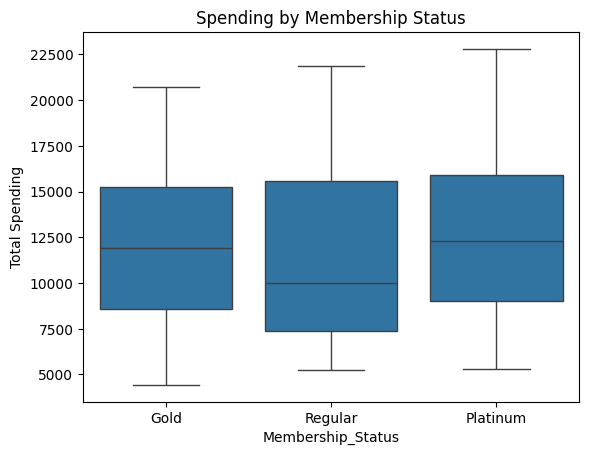

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

#Visual Representation of the Various Membership and there spending
sns.boxplot(x='Membership_Status', y='Total Spending', data=df)
plt.title("Spending by Membership Status")
plt.show()


### Using the  post-hoc pairwise comparisons to identify which specific membership levels differ.

##### Why using Dunn Test ?
1. None param alternative to tukey Test
2. Work with kruskal - Wallis
3. Supports multiple comparison adjustments like Bonferroni, holm and fdr_bh etc

In [19]:
import scikit_posthocs as sp

# Only keep the two columns
subset = df[['Membership_Status', 'Total Spending']].dropna()

# Run Dunn’s Test
posthoc = sp.posthoc_dunn(subset, val_col='Total Spending', group_col='Membership_Status', p_adjust='holm')

# Display the pairwise comparison p-values
print("📊 Dunn Test Results (holm-corrected p-values):")
print(posthoc)


📊 Dunn Test Results (holm-corrected p-values):
              Gold  Platinum   Regular
Gold      1.000000  0.709615  0.709615
Platinum  0.709615  1.000000  0.239224
Regular   0.709615  0.239224  1.000000


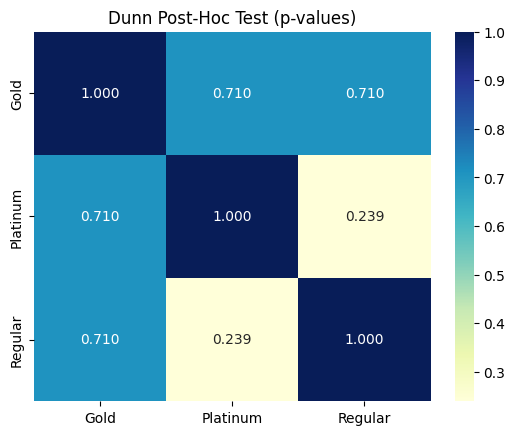

In [20]:
#Visual Representation of the Dunn Test 

sns.heatmap(posthoc, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Dunn Post-Hoc Test (p-values)")
plt.show()